In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

In [12]:
import requests
url='https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv'
r=requests.get(url,allow_redirects=True)


from io import StringIO
data=StringIO(r.text)

df=pd.read_csv(data)

In [13]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [14]:
df['targets']=df['labels'].astype('category').cat.codes

In [15]:
df_train,df_test=train_test_split(df,test_size=0.3)

In [16]:
tfidf=TfidfVectorizer(stop_words='english')
Xtrain=tfidf.fit_transform(df_train['text'])
Xtest=tfidf.transform(df_test['text'])

In [17]:
ytrain=df_train['targets']
ytest=df_test['targets']

In [19]:
K=df['targets'].max()+1
K

5

In [23]:
D=Xtrain.shape[1]

In [24]:
i=Input(shape=(D,))
x=Dense(300,activation='relu')(i)
x=Dense(K)(x)

In [27]:
model=Model(i,x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25127)]           0         
                                                                 
 dense (Dense)               (None, 300)               7538400   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7539905 (28.76 MB)
Trainable params: 7539905 (28.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
optimizer='adam',
metrics=['accuracy']

)

In [29]:
Xtrain=Xtrain.toarray()
Xtest=Xtest.toarray()

In [30]:
r=model.fit(Xtrain,ytrain,validation_data=(Xtest,ytest),epochs=7,batch_size=128)

Epoch 1/7
13/13 [==============================] - 3s 152ms/step - loss: 1.4565 - accuracy: 0.8638 - val_loss: 1.1680 - val_accuracy: 0.9686
Epoch 2/7
13/13 [==============================] - 2s 127ms/step - loss: 0.8905 - accuracy: 0.9949 - val_loss: 0.6966 - val_accuracy: 0.9746
Epoch 3/7
13/13 [==============================] - 2s 122ms/step - loss: 0.4299 - accuracy: 0.9974 - val_loss: 0.3932 - val_accuracy: 0.9746
Epoch 4/7
13/13 [==============================] - 2s 120ms/step - loss: 0.1901 - accuracy: 0.9987 - val_loss: 0.2509 - val_accuracy: 0.9775
Epoch 5/7
13/13 [==============================] - 2s 124ms/step - loss: 0.0927 - accuracy: 0.9994 - val_loss: 0.1862 - val_accuracy: 0.9790
Epoch 6/7
13/13 [==============================] - 1s 115ms/step - loss: 0.0537 - accuracy: 1.0000 - val_loss: 0.1558 - val_accuracy: 0.9790
Epoch 7/7
13/13 [==============================] - 1s 114ms/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.1381 - val_accuracy: 0.9790


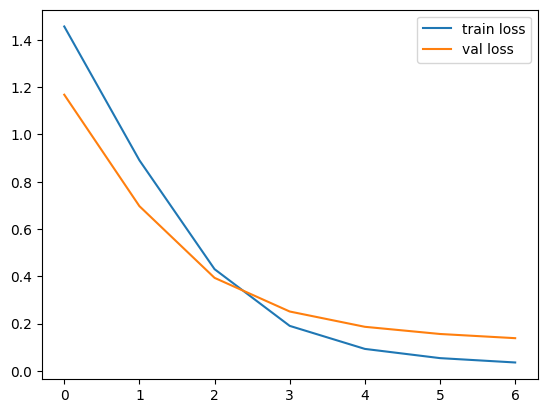

In [31]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()

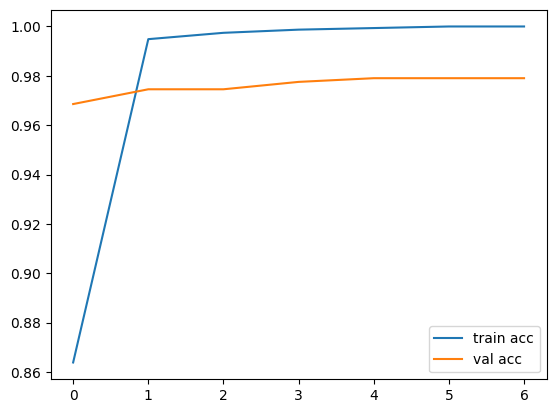

In [32]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()

<Axes: >

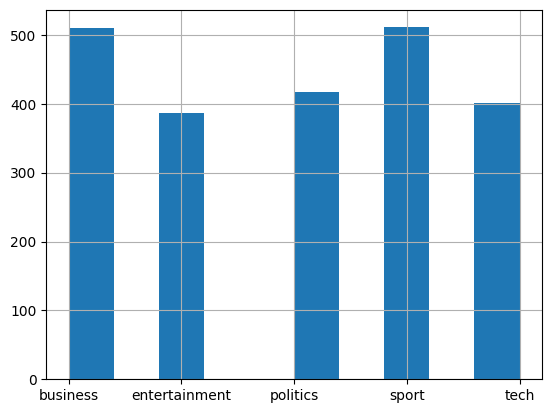

In [33]:
df['labels'].hist()